<a href="https://colab.research.google.com/github/aryamanpathak2022/IAT_DASS_PAPER/blob/main/stats_iat_dass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [2]:
# Load the dataset
file_path = './drive/MyDrive/NIMHANS/IAT_DASS - IAT_DASS.csv'  # Replace with the path to your CSV file
data = pd.read_csv(file_path)

In [3]:
print(data.columns)

Index(['Sno', 'Q1', 'Q2', 'Unnamed: 3', 'Q3', 'Q4', 'Q5', 'Q6', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Q7', 'Unnamed: 13',
       'Unnamed: 14', 'Q8', 'Q9', 'Q10', 'Unnamed: 18', 'Unnamed: 19', 'Q11',
       'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q1_i(1)', 'Q1_i(2)',
       'Q1_i(3)', 'Q1_i(4)', 'Q1_i(5)', 'Q1_i(6)', 'Q1_i(7)', 'Q1_i(8)',
       'Q1_i(9)', 'Q1_i(10)', 'Q1_i(11)', 'Q1_i(12)', 'Q1_i(13)', 'Q1_i(14)',
       'Q1_i(15)', 'Q1_i(16)', 'Q1_i(17)', 'Q1_i(18)', 'Q1_i(19)', 'Q1_i(20)',
       'Q1(1)', 'Q1(2)', 'Q3(3)', 'Q4(4)', 'Q5(5)', 'Q6(6)', 'Q2(7)', 'Q2(8)',
       'Q2(9)', 'Q2(10)', 'Q2(11)', 'Q2(12)', 'Q2(13)', 'Q2(14)', 'Q2(15)',
       'Q2(16)', 'Q2(17)', 'Q2(18)', 'Q2(19)', 'Q2(20)', 'Q2(21)',
       'Depression (D)', 'Anxiety (A)', 'Stress (S)'],
      dtype='object')


In [4]:
# Define ranges for classes
def classify_depression(d):
    if d <= 9:
        return 'Normal'
    elif 10 <= d <= 13:
        return 'Mild'
    elif 14 <= d <= 20:
        return 'Moderate'
    elif 21 <= d <= 27:
        return 'Severe'
    else:
        return 'Extremely Severe'

def classify_anxiety(a):
    if a <= 7:
        return 'Normal'
    elif 8 <= a <= 9:
        return 'Mild'
    elif 10 <= a <= 14:
        return 'Moderate'
    elif 15 <= a <= 19:
        return 'Severe'
    else:
        return 'Extremely Severe'

def classify_stress(s):
    if s <= 14:
        return 'Normal'
    elif 15 <= s <= 18:
        return 'Mild'
    elif 19 <= s <= 25:
        return 'Moderate'
    elif 26 <= s <= 33:
        return 'Severe'
    else:
        return 'Extremely Severe'

In [5]:
# Apply classification functions
data['Depression_Class'] = data['Depression (D)'].apply(classify_depression)
data['Anxiety_Class'] = data['Anxiety (A)'].apply(classify_anxiety)
data['Stress_Class'] = data['Stress (S)'].apply(classify_stress)

In [6]:
# Encode categorical classes
le = LabelEncoder()
data['Depression_Class'] = le.fit_transform(data['Depression_Class'])
data['Anxiety_Class'] = le.fit_transform(data['Anxiety_Class'])
data['Stress_Class'] = le.fit_transform(data['Stress_Class'])

In [7]:
iat_columns = [f'Q1_i({i})' for i in range(1, 21)]
data['iat_score'] = data[iat_columns].sum(axis=1)

In [8]:
# Categorize IAT scores into addiction levels
def categorize_iat(iat):
    if 0 <= iat <= 30:
        return 'Normal'
    elif 31 <= iat <= 49:
        return 'Mild Addiction'
    elif 50 <= iat <= 79:
        return 'Moderate Addiction'
    elif 80 <= iat <= 100:
        return 'Severe Addiction'
    else:
        return 'Invalid Score'

# Apply categorization
data['Addiction_Level'] = data['iat_score'].apply(categorize_iat)

In [9]:
# Rename Q1-Q18 columns to meaningful names
data.rename(columns={
    'Q1': 'Age',
    'Q2': 'Gender',
    'Q3': 'Socioeconomic_status',
    'Q4': 'Education',
    'Q5': 'Occupation',
    'Q6': 'Marital_status',
    'Q7': 'Family_status',
    'Q8': 'Cell_phone_count',
    'Q9': 'Mobile_type',
    'Q10': 'Connection_type',
    'Q11': 'Phantom_vibration_frequency',
    'Q12': 'Internet_mobile_expenses',
    'Q13': 'Handsfree_use',
    'Q14': 'Mobile_while_driving',
    'Q15': 'Daily_calls',
    'Q16': 'Phone_near_sleep',
    'Q17': 'Technology_overuse',
    'Q18': 'Other',
}, inplace=True)

In [ ]:
print(data.columns)

Index(['Sno', 'Age', 'Gender', 'Unnamed: 3', 'Socioeconomic_status',
       'Education', 'Occupation', 'Marital_status', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Family_status', 'Unnamed: 13',
       'Unnamed: 14', 'Cell_phone_count', 'Mobile_type', 'Connection_type',
       'Unnamed: 18', 'Unnamed: 19', 'Phantom_vibration_frequency',
       'Handsfree_use', 'Mobile_while_driving', 'Daily_calls',
       'Phone_near_sleep', 'Technology_overuse', 'Other', 'Q1_i(1)', 'Q1_i(2)',
       'Q1_i(3)', 'Q1_i(4)', 'Q1_i(5)', 'Q1_i(6)', 'Q1_i(7)', 'Q1_i(8)',
       'Q1_i(9)', 'Q1_i(10)', 'Q1_i(11)', 'Q1_i(12)', 'Q1_i(13)', 'Q1_i(14)',
       'Q1_i(15)', 'Q1_i(16)', 'Q1_i(17)', 'Q1_i(18)', 'Q1_i(19)', 'Q1_i(20)',
       'Q1(1)', 'Q1(2)', 'Q3(3)', 'Q4(4)', 'Q5(5)', 'Q6(6)', 'Q2(7)', 'Q2(8)',
       'Q2(9)', 'Q2(10)', 'Q2(11)', 'Q2(12)', 'Q2(13)', 'Q2(14)', 'Q2(15)',
       'Q2(16)', 'Q2(17)', 'Q2(18)', 'Q2(19)', 'Q2(20)', 'Q2(21)',
       'Depression (D)', 'Anxiety (A)', 'St

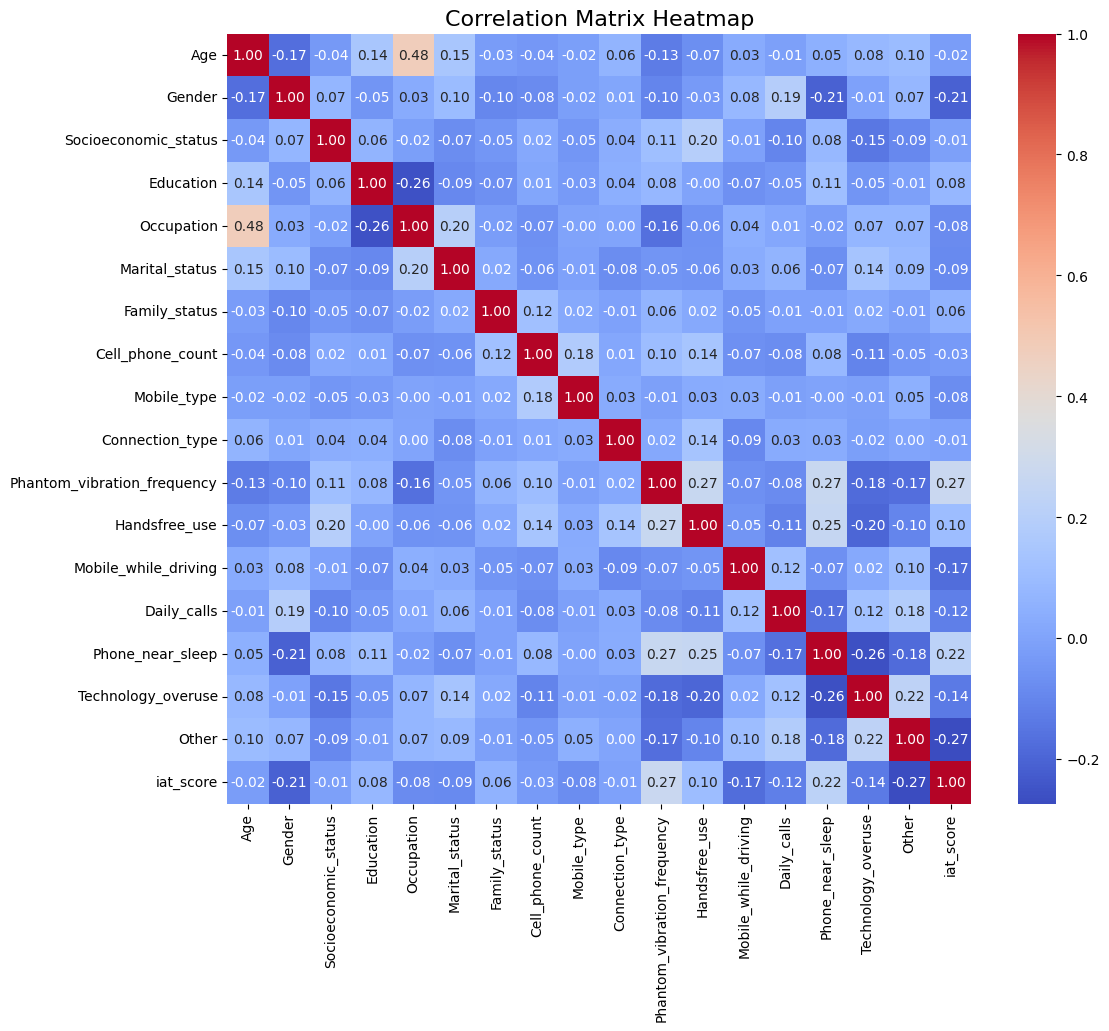

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Remove rows where 'iat_score' is null
data = data.dropna(subset=['iat_score'])

# Specify the relevant columns (renamed from Q1-Q18) and 'iat_score'
relevant_columns = [
    'Age', 'Gender', 'Socioeconomic_status', 'Education', 'Occupation',
    'Marital_status', 'Family_status', 'Cell_phone_count', 'Mobile_type',
    'Connection_type', 'Phantom_vibration_frequency',
    'Handsfree_use', 'Mobile_while_driving', 'Daily_calls', 'Phone_near_sleep',
    'Technology_overuse', 'Other', 'iat_score'
]

# Select only the relevant columns
selected_data = data[relevant_columns]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Set title for the plot
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

In [ ]:
data.head()

Statistical Summary:
       Phantom_vibration_frequency  Phone_near_sleep  Excessive_Technology_Use
count                   725.000000        725.000000                725.000000
mean                      1.219310          1.908966                  1.577931
std                       0.689433          0.826020                  0.513421
min                       0.000000          0.000000                  0.000000
25%                       1.000000          1.000000                  1.000000
50%                       1.000000          2.000000                  2.000000
75%                       1.000000          3.000000                  2.000000
max                       3.000000          3.000000                  3.000000


<ipython-input-70-5f00d6f32e78>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Addiction_Level', palette='viridis', order=['Normal', 'Mild Addiction', 'Moderate Addiction', 'Severe Addiction'])


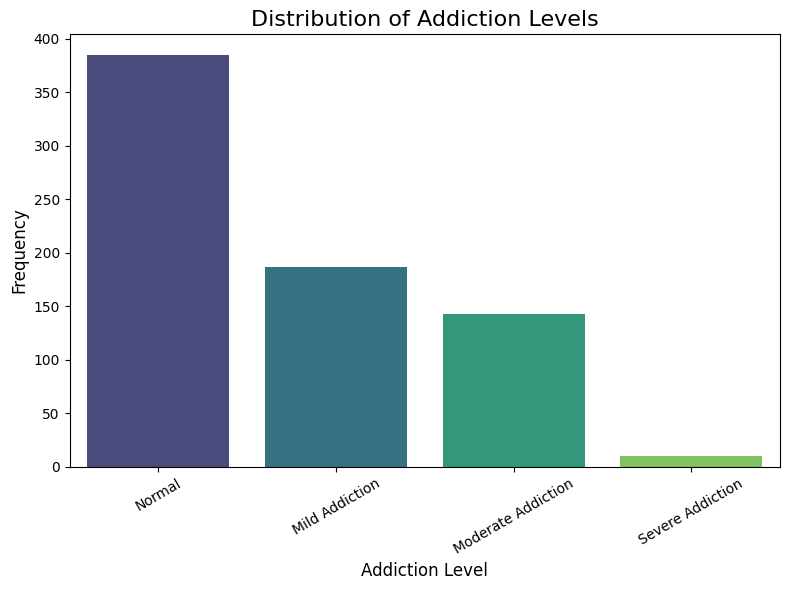

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Rename the column 'Other' to a more descriptive name
data.rename(columns={
    'Other': 'Excessive_Technology_Use'  # Column 18 description
}, inplace=True)

# Categorize IAT scores into addiction levels
def categorize_iat(iat):
    if 0 <= iat <= 30:
        return 'Normal'
    elif 31 <= iat <= 49:
        return 'Mild Addiction'
    elif 50 <= iat <= 79:
        return 'Moderate Addiction'
    elif 80 <= iat <= 100:
        return 'Severe Addiction'
    else:
        return 'Invalid Score'

# Apply categorization
data['Addiction_Level'] = data['iat_score'].apply(categorize_iat)

# Perform statistical analysis
stats_columns = ['Phantom_vibration_frequency', 'Phone_near_sleep', 'Excessive_Technology_Use']
stats = data[stats_columns].describe()

# Display stats
print("Statistical Summary:")
print(stats)

# Plot distribution of addiction levels
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Addiction_Level', palette='viridis', order=['Normal', 'Mild Addiction', 'Moderate Addiction', 'Severe Addiction'])

# Add labels and title
plt.title('Distribution of Addiction Levels', fontsize=16)
plt.xlabel('Addiction Level', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Optional: Save plot if needed
# plt.savefig("addiction_level_distribution.png")

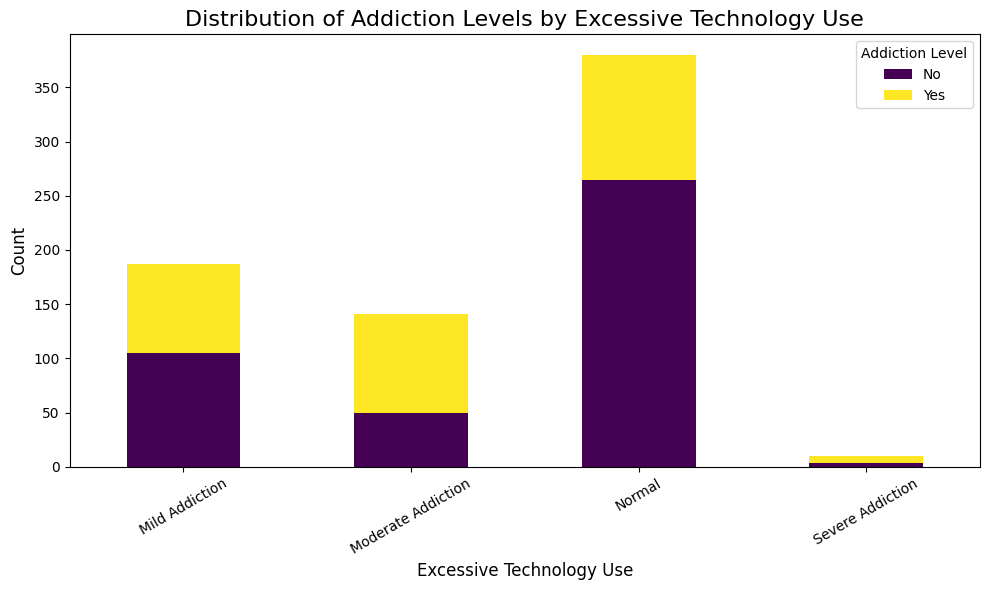

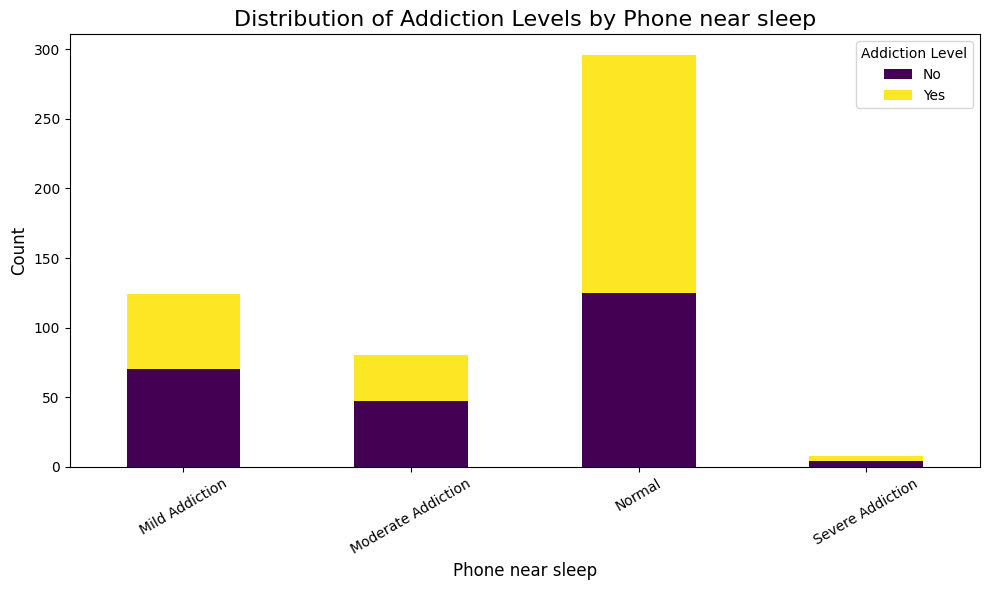

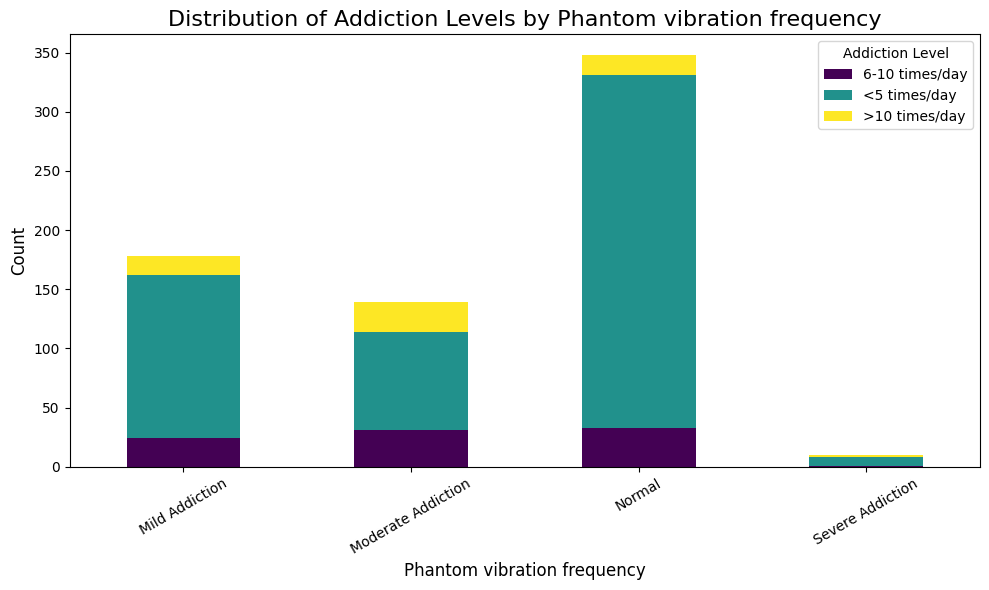

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Map numeric values to categorical responses for selected columns
data['Excessive_Technology_Use'] = data['Excessive_Technology_Use'].map({1: 'Yes', 2: 'No'})
data['Phone_near_sleep'] = data['Phone_near_sleep'].map({1: 'Yes', 2: 'No'})
data['Phantom_vibration_frequency'] = data['Phantom_vibration_frequency'].map({
    1: '<5 times/day',
    2: '6-10 times/day',
    3: '>10 times/day'
})

# Selected columns for grouping
columns_to_plot = ['Excessive_Technology_Use', 'Phone_near_sleep', 'Phantom_vibration_frequency']

# Plot bar graphs for each column
for column in columns_to_plot:
    # Group by Addiction Level and the column
    group_counts = data.groupby(['Addiction_Level', column]).size().unstack(fill_value=0)

    # Plot bar graph
    group_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title(f"Distribution of Addiction Levels by {column.replace('_', ' ')}", fontsize=16)
    plt.xlabel(column.replace('_', ' '), fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=30)
    plt.legend(title="Addiction Level", fontsize=10)
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Replace 'data' with the actual variable name holding your dataset if necessary

# Rename Q1-Q18 columns to meaningful names
data.rename(columns={
    'Q1': 'Age',
    'Q2': 'Gender',
    'Q3': 'Socioeconomic_status',
    'Q4': 'Education',
    'Q5': 'Occupation',
    'Q6': 'Marital_status',
    'Q7': 'Family_status',
    'Q8': 'Cell_phone_count',
    'Q9': 'Mobile_type',
    'Q10': 'Connection_type',
    'Q11': 'Phantom_vibration_frequency',
    'Q12': 'Internet_mobile_expenses',
    'Q13': 'Handsfree_use',
    'Q14': 'Mobile_while_driving',
    'Q15': 'Daily_calls',
    'Q16': 'Phone_near_sleep',
    'Q17': 'Technology_overuse',
    'Q18': 'Other',
}, inplace=True)

# Select relevant numeric columns for analysis
numeric_columns = ['Age', 'Socioeconomic_status', 'Cell_phone_count']

# Describe the statistics for numeric columns
numeric_stats = data[numeric_columns].describe()

# List of categorical columns for analysis
categorical_columns = [
    'Gender', 'Education', 'Occupation', 'Marital_status', 'Family_status',
    'Mobile_type', 'Connection_type', 'Phantom_vibration_frequency',
    'Handsfree_use', 'Mobile_while_driving', 'Daily_calls', 'Phone_near_sleep',
    'Technology_overuse', 'Excessive_Technology_Use'
]

# Get summary statistics for categorical columns
categorical_stats = data[categorical_columns].describe()

# Get frequency counts for each category in each column
category_frequencies = {}
for col in categorical_columns:
    category_frequencies[col] = data[col].value_counts()

# Print the statistics for numeric columns
print("Numeric Columns Statistics:\n", numeric_stats)

# Print the categorical statistics (unique, top, freq)
print("\nCategorical Columns Statistics:\n", categorical_stats)

# Print the frequency count for each categorical column
print("\nCategory Frequencies:\n", category_frequencies)

Numeric Columns Statistics:
               Age  Socioeconomic_status  Cell_phone_count
count  725.000000          7.250000e+02        725.000000
mean    21.062069          3.503862e+04          1.173793
std      3.091203          8.707830e+04          0.467304
min     17.000000          5.000000e+02          0.000000
25%     19.000000          1.000000e+04          1.000000
50%     20.000000          1.200000e+04          1.000000
75%     22.000000          2.500000e+04          1.000000
max     31.000000          1.400000e+06          4.000000

Categorical Columns Statistics:
            Gender   Education  Occupation  Marital_status  Family_status  \
count  725.000000  725.000000  725.000000      724.000000     724.000000   
mean     1.628966    3.064828    1.304828        1.162983       1.371547   
std      0.483415    0.691257    0.688935        0.483143       0.610029   
min      1.000000    1.000000    1.000000        1.000000       1.000000   
25%      1.000000    3.000000    1.

In [ ]:
# Summary of IAT distribution across demographics
iat_demo_summary = data.groupby(['Gender', 'Socioeconomic_status', 'Education', 'Occupation', 'Marital_status'])['iat_score'].describe()

# Summarize DASS categories and IAT levels
dass_iat_summary = data.groupby(['Depression_Class', 'Anxiety_Class', 'Stress_Class', 'Addiction_Level']).size()
dass_iat_summary = dass_iat_summary.reset_index(name='Count')

In [ ]:
print(data[['Age', 'iat_score']].dtypes)

Age          int64
iat_score    int64
dtype: object


In [ ]:
# Convert all columns to numeric, coercing errors into NaN
data = data.apply(pd.to_numeric, errors='coerce')

In [ ]:
# Fill NaN values with a default value (e.g., 0) or drop them
data = data.fillna(0)

# Convert float columns to integers
data['Age'] = data['Age'].astype(int)
data['iat_score'] = data['iat_score'].astype(int)

In [ ]:
from scipy.stats import chi2_contingency, f_oneway, pearsonr

# Chi-Square Test (e.g., Gender vs. Addiction Level)
chi2_data = pd.crosstab(data['Gender'], data['Addiction_Level'])
chi2_stat, chi2_p, _, _ = chi2_contingency(chi2_data)

# ANOVA (e.g., IAT Score vs. Depression Classes)
anova_stat, anova_p = f_oneway(
    data.loc[data['Depression_Class'] == 'Normal', 'iat_score'],
    data.loc[data['Depression_Class'] == 'Mild', 'iat_score'],
    data.loc[data['Depression_Class'] == 'Moderate', 'iat_score'],
    data.loc[data['Depression_Class'] == 'Severe', 'iat_score'],
    data.loc[data['Depression_Class'] == 'Extremely Severe', 'iat_score']
)

# Correlation (e.g., Age vs. IAT Score)
corr_coeff, corr_p = pearsonr(data['Age'], data['iat_score'])

print(f"Chi-Square p-value: {chi2_p}")
print(f"ANOVA p-value: {anova_p}")
print(f"Correlation coefficient: {corr_coeff}, p-value: {corr_p}")

Chi-Square p-value: 1.0
ANOVA p-value: nan
Correlation coefficient: -0.045188141448856405, p-value: 0.22427102679086022


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [19]:
data.columns

Index(['Sno', 'Age', 'Gender', 'Unnamed: 3', 'Socioeconomic_status',
       'Education', 'Occupation', 'Marital_status', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Family_status', 'Unnamed: 13',
       'Unnamed: 14', 'Cell_phone_count', 'Mobile_type', 'Connection_type',
       'Unnamed: 18', 'Unnamed: 19', 'Phantom_vibration_frequency',
       'Handsfree_use', 'Mobile_while_driving', 'Daily_calls',
       'Phone_near_sleep', 'Technology_overuse', 'Other', 'Q1_i(1)', 'Q1_i(2)',
       'Q1_i(3)', 'Q1_i(4)', 'Q1_i(5)', 'Q1_i(6)', 'Q1_i(7)', 'Q1_i(8)',
       'Q1_i(9)', 'Q1_i(10)', 'Q1_i(11)', 'Q1_i(12)', 'Q1_i(13)', 'Q1_i(14)',
       'Q1_i(15)', 'Q1_i(16)', 'Q1_i(17)', 'Q1_i(18)', 'Q1_i(19)', 'Q1_i(20)',
       'Q1(1)', 'Q1(2)', 'Q3(3)', 'Q4(4)', 'Q5(5)', 'Q6(6)', 'Q2(7)', 'Q2(8)',
       'Q2(9)', 'Q2(10)', 'Q2(11)', 'Q2(12)', 'Q2(13)', 'Q2(14)', 'Q2(15)',
       'Q2(16)', 'Q2(17)', 'Q2(18)', 'Q2(19)', 'Q2(20)', 'Q2(21)',
       'Depression (D)', 'Anxiety (A)', 'St

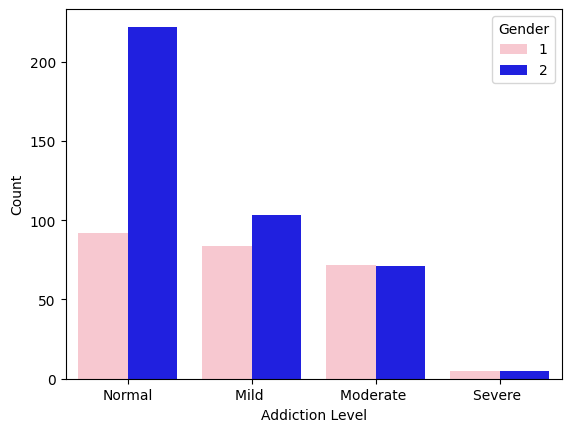

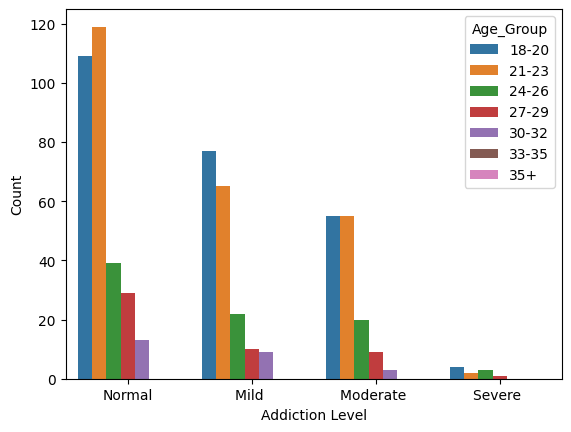

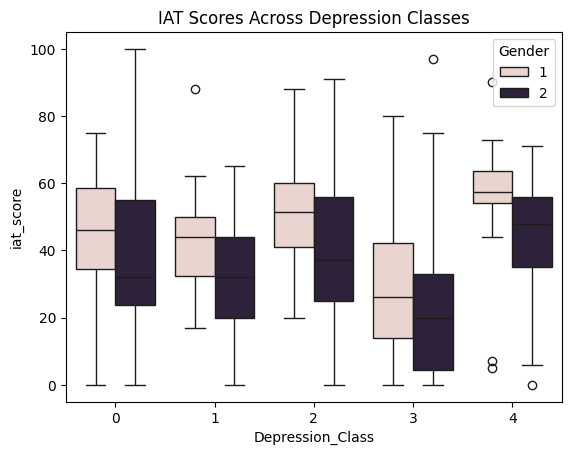

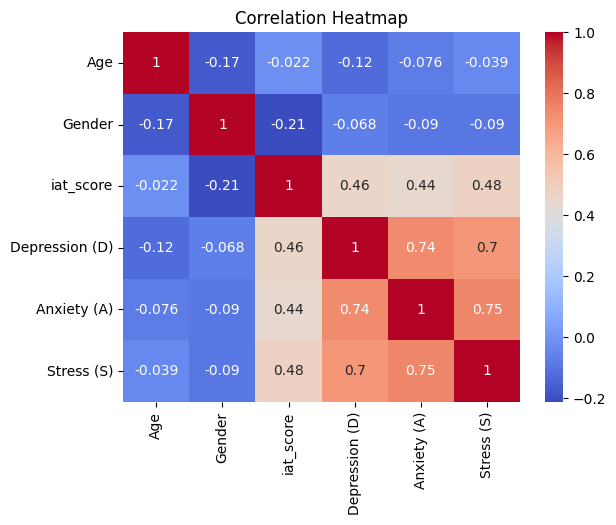

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Categorize the iat_score into Addiction Levels
bins = [0, 30, 49, 79, 100]  # IAT score bins
labels = ['Normal', 'Mild ', 'Moderate ', 'Severe ']
data['Addiction_Level'] = pd.cut(data['iat_score'], bins=bins, labels=labels, right=True)

# Plot Addiction Levels by Gender with custom colors
sns.countplot(data=data, x='Addiction_Level', hue='Gender', palette={2: 'blue', 1: 'pink'})
# plt.title('Addiction Levels by Gender')
plt.xlabel('Addiction Level')
plt.ylabel('Count')
plt.show()

# Age Binning (as provided earlier)
bins_age = [18, 20, 23, 26, 29, 32, 35, 100]  # Age bins
labels_age = ['18-20', '21-23', '24-26', '27-29', '30-32', '33-35', '35+']
data['Age_Group'] = pd.cut(data['Age'], bins=bins_age, labels=labels_age, right=False)

# Create the count plot for Addiction Levels by Age Group
sns.countplot(data=data, x='Addiction_Level', hue='Age_Group')
# plt.title('Addiction Levels by Age Group')
plt.xlabel('Addiction Level')
plt.ylabel('Count')
plt.show()

# Box plot for IAT scores across DASS categories
sns.boxplot(data=data, x='Depression_Class', y='iat_score', hue='Gender')
plt.title('IAT Scores Across Depression Classes')
plt.show()

# Heatmap for correlations
correlation_matrix = data[['Phantom_vibration_frequency','Phone_near_sleep', 'Technology_overuse','iat_score', 'Depression (D)', 'Anxiety (A)', 'Stress (S)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
data["Socioeconomic_status"]

,Socioeconomic_status
0,10000
1,50000
2,15000
3,50000
4,40000
...,...
720,30000
721,20000
722,11000
723,20000


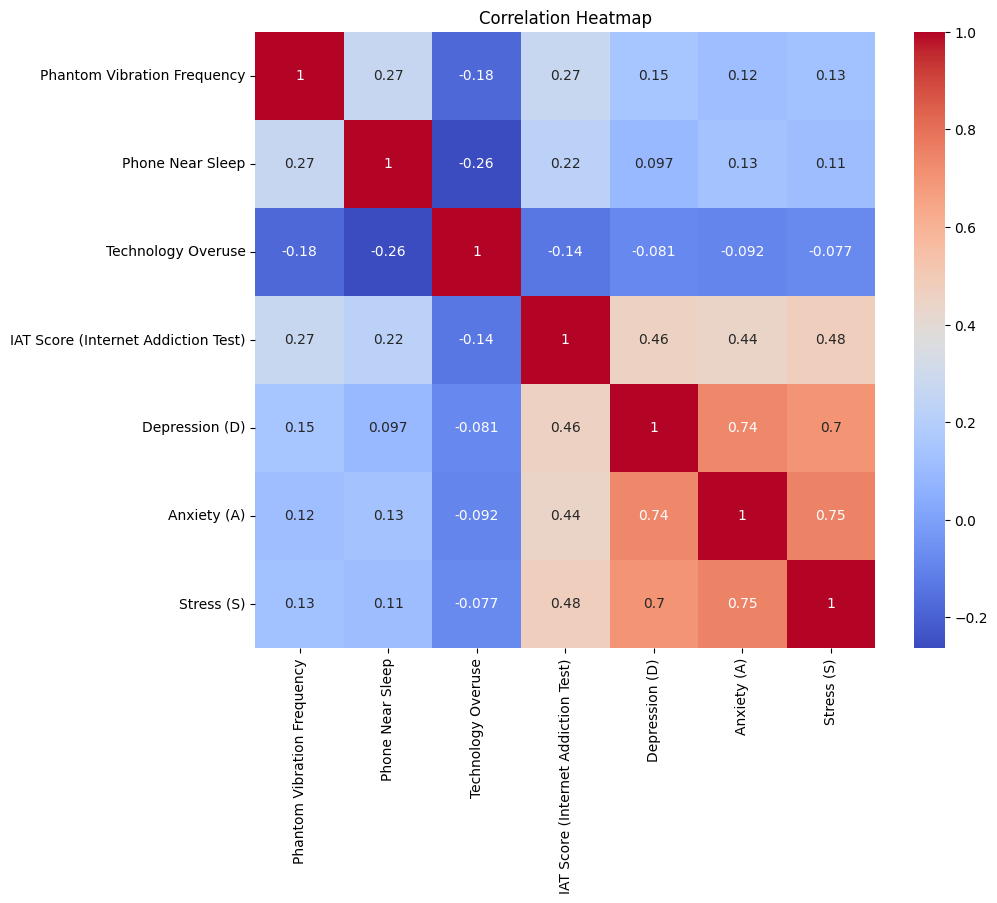

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define more meaningful labels
labels = {
    'Phantom_vibration_frequency': 'Phantom Vibration Frequency',
    'Phone_near_sleep': 'Phone Near Sleep',
    'Technology_overuse': 'Technology Overuse',
    'iat_score': 'IAT Score (Internet Addiction Test)',
    'Depression (D)': 'Depression (D)',
    'Anxiety (A)': 'Anxiety (A)',
    'Stress (S)': 'Stress (S)'
}

# Adjust the labels for readability
correlation_matrix = data[['Phantom_vibration_frequency', 'Phone_near_sleep',
                           'Technology_overuse', 'iat_score', 'Depression (D)',
                           'Anxiety (A)', 'Stress (S)']].corr()

# Plot the heatmap with more readable labels
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=[labels[col] for col in correlation_matrix.columns], yticklabels=[labels[col] for col in correlation_matrix.columns])
plt.title('Correlation Heatmap')
plt.show()

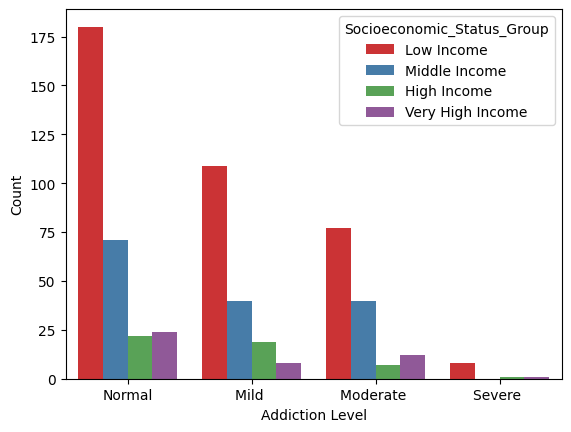

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define bins for Socioeconomic Status (monthly salary in Rs.)
bins_ses = [0, 15000, 30000, 50000, 100000]  # Example salary bins (low, medium, high)
labels_ses = ['Low Income', 'Middle Income', 'High Income', 'Very High Income']
data['Socioeconomic_Status_Group'] = pd.cut(data['Socioeconomic_status'], bins=bins_ses, labels=labels_ses, right=True)

# Plot Addiction Levels by Socioeconomic Status
sns.countplot(data=data, x='Addiction_Level', hue='Socioeconomic_Status_Group', palette='Set1')
# plt.title('Addiction Levels by Socioeconomic Status')
plt.xlabel('Addiction Level')
plt.ylabel('Count')
plt.show()